## A3: Geopython Notebook
The purpose of this assignment was to acquire knowledge in the basic steps of working with Satellite Images in Python, specifically leveraging numpy, matplotlib, and rasterio. To achieve this, I followed a series of blog tutorials titled "Python for Geosciences: Working with Satellite Images (step by step)" created by Maurício Cordeiro. These tutorials can be accessed through the following link: [Python for Remote Sensing](https://medium.com/@cordmaur/list/python-for-remote-sensing-25d32ab8f21d). 

### Data and Study Area
The dataset utilized in this analysis is a Landsat 8 OLI/TIRS C2 L2 Image with the filename LC08_L2SP_010057_20210915_20210925_02_T1. This image was downloaded from Earth Explorer and covers Buenaventura, a coastal seaport city situated in the Pacific Region of the Valle del Cauca department, Colombia. Buenaventura serves as Colombia's primary port on the Pacific Ocean, with its development predominantly concentrated on Cascajal Island.

### Part 0: Import required modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from pathlib import Path
import warnings
warnings.filterwarnings("ignore")


### Part 1: Working with Satellite Imagery

#### 1.1 Opening the image
For example, to start, opened just the Band 2:

In [2]:
ds=rasterio.open("data/LC08_L2SP_010057_20210915_20210925_02_T1_SR_B2.TIF")
ds

<open DatasetReader name='data/LC08_L2SP_010057_20210915_20210925_02_T1_SR_B2.TIF' mode='r'>

Accessed the attributes as the transformation and CRS:

In [3]:
ds.transform

Affine(30.0, 0.0, 102285.0,
       0.0, -30.0, 596115.0)

In [4]:
ds.crs

CRS.from_epsg(32618)

#### 1.2 Accessing the image values
To access the actual pixel values, utilized the read command and specified the desired band for reading. To examine the available bands, used ds.indexes. In this case, only one band (index 1) is defined, representing the Band 2.

In [5]:
ds.indexes

(1,)

In [6]:
img=ds.read(1)
img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

Basic characteritics of the array:

In [7]:
img.shape

(7761, 7611)

In [8]:
img.min(), img.max()

(0, 47914)

Accessed individual pixel values:

In [9]:
img[1044, 1444]

7436

#### 1.3 Image Visualization
Employed matplotlib to visualize the array data. Specifically, imshow function:

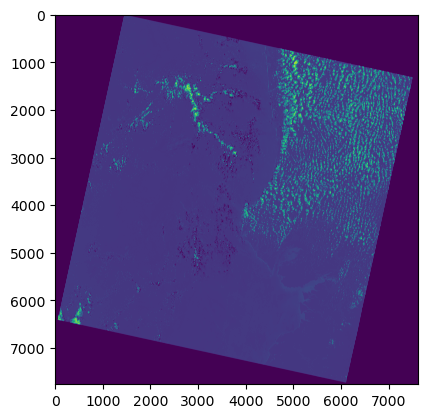

In [10]:
plt.imshow(img)

### Part 2: Satellite Image Analysis


#### 2.1 The Load Image Function
To enhance code cleanliness and reusability, created a function that loads the requested bands and organizes them into a unified dictionary
* Path.glob is the function to search for files that match a specific pattern: “*B2_.tif” or “*B3_.tif”
* In this case, only the first match was required, then the next function was used as well

In [11]:
def load_landsat_image(img_folder, bands):
    img_dict = {}
    path = Path(img_folder)
    for band in bands:
        # considering the landsat images end with *_SR_B#.TIF, we will use it to locate the correct file
        file = next(path.glob(f'*{band}.tif'))
        print(f'Opening file {file}')
        ds = rasterio.open(file)
        img_dict.update({band: ds.read(1)})
    return img_dict

In [12]:
# Load Bands
bands = ['B1','B2', 'B3', 'B4', 'B5', 'B6', 'B7']
img_dict = load_landsat_image('data', bands)
img_dict.keys(), img_dict.values()

Opening file data\LC08_L2SP_010057_20210915_20210925_02_T1_SR_B1.TIF
Opening file data\LC08_L2SP_010057_20210915_20210925_02_T1_SR_B2.TIF
Opening file data\LC08_L2SP_010057_20210915_20210925_02_T1_SR_B3.TIF
Opening file data\LC08_L2SP_010057_20210915_20210925_02_T1_SR_B4.TIF
Opening file data\LC08_L2SP_010057_20210915_20210925_02_T1_SR_B5.TIF
Opening file data\LC08_L2SP_010057_20210915_20210925_02_T1_SR_B6.TIF
Opening file data\LC08_L2SP_010057_20210915_20210925_02_T1_SR_B7.TIF


(dict_keys(['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7']),
 dict_values([array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint16), array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint16), array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint16), array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint16), array([[0, 0, 0, ..., 0, 0

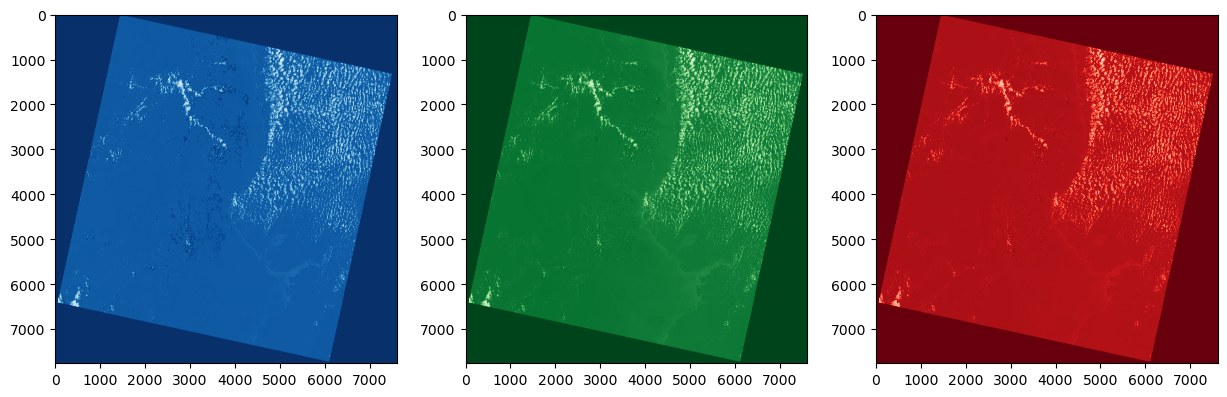

In [13]:
# Display the loaded bands
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(img_dict['B2'], cmap='Blues_r')
ax[1].imshow(img_dict['B3'], cmap='Greens_r')
ax[2].imshow(img_dict['B4'], cmap='Reds_r')

#### 2.2 The Create Composite Function
Created a function that facilitated the display of a three bands composite.

* In the documentation of the imshow function, it is specified that the input array can have a shape of (N, M, 3) with values represented as floats ranging from 0 to 1 or integers ranging from 0 to 255. In this case, the individual bands were already loaded as arrays with shapes (N, M). Therefore, to create the composite, the bands were combined using the stack function from NumPy.
* By default, the stack function indexes the joined arrays along the first axis (axis=0), resulting in a final cube with a shape of (3, N, M). To ensure the correct order for the imshow function, the axis=-1 parameter was used in the stack function.
* To normalize the values and ensure they range from 0 to 1, they were divided by the maximum value. Additionally, the alpha parameter (brightness) was utilized for visualization purposes, addressing situations where cloud pixels appear brighter compared to land pixels

In [14]:
def create_composite(img_dict, b_a, b_b, b_c, alpha=1.):
    composite = np.stack([img_dict[b_a], img_dict[b_b], img_dict[b_c]], axis=-1)
    composite = composite/composite.max() * alpha
    return composite

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


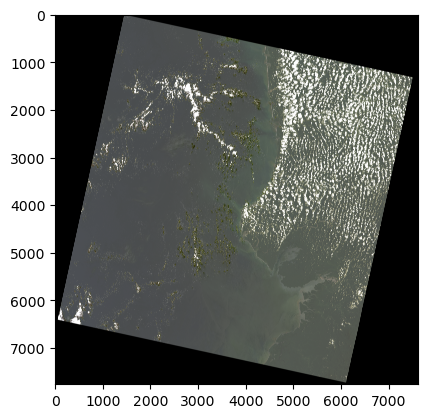

In [15]:
# True color
true_color=create_composite(img_dict, 'B4', 'B3', 'B2', alpha=2.)
plt.figure()
plt.imshow(true_color)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


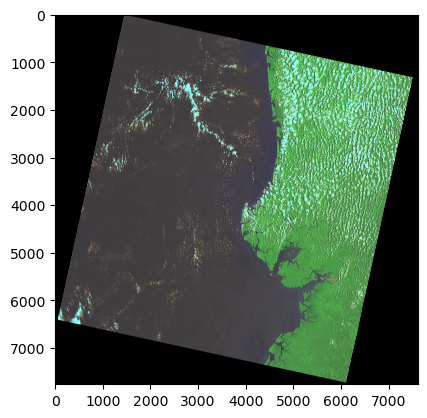

In [16]:
# False Color
false_color=create_composite(img_dict, 'B7', 'B5', 'B3', alpha=2.)
plt.figure()
plt.imshow(false_color)

#### 2.3 Create a Normalized Difference Index function
A function was created to compute a Normalized Difference (ND) index, which involves calculating the difference between two bands and dividing it by their sum

* Utilized the numpy.where function to verify and avoid cases where the denominator was zero

In [17]:
def normalized_difference_index(img_dict, b_a, b_b, eps=0.0001):
    band_a = np.where((img_dict[b_a]==0) & (img_dict[b_b]==0), np.nan, img_dict[b_a])
    band_b= np.where((img_dict[b_a]==0) & (img_dict[b_b]==0), np.nan, img_dict[b_b])
    
    return (band_a - band_b) / (band_a + band_b)

In [18]:
ndvi = normalized_difference_index(img_dict, 'B5', 'B4')
mndwi = normalized_difference_index(img_dict, 'B3', 'B5')

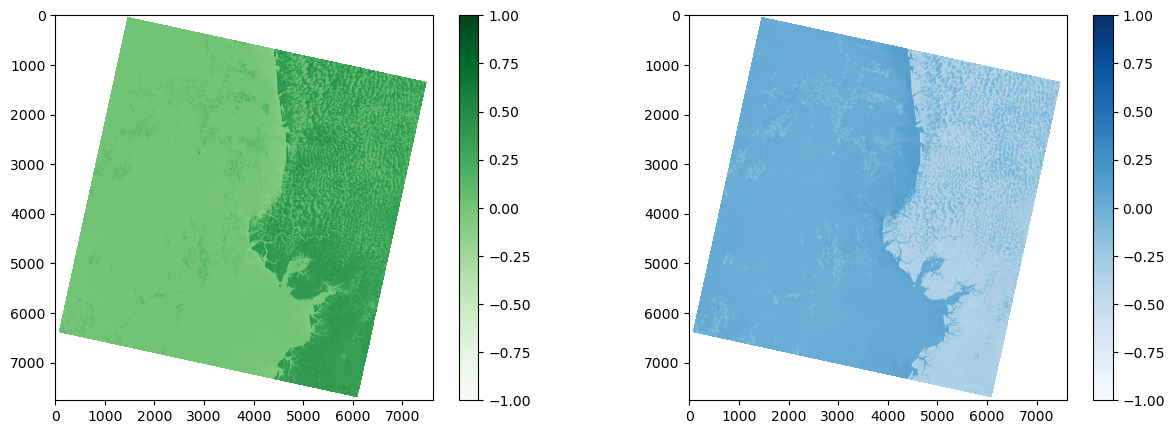

In [19]:
# Display the calculated indexes
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
im1=ax[0].imshow(ndvi, cmap='Greens')
im2=ax[1].imshow(mndwi, cmap='Blues')
# Add colorbars to the subplots
fig.colorbar(im1, ax=ax[0])
fig.colorbar(im2, ax=ax[1])

#### 2.4 Masking by index values
For simplicity, defined water pixels as those with an MNDWI (Modified Normalized Difference Water Index) value greater than 0.0. The clouds must be masked before as they are incorrectly classified as land, but this will be done in the Part 4

In [20]:
water_mask = mndwi > 0.0
water_mask


array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

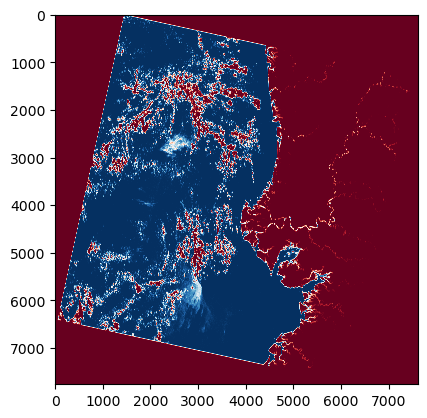

In [21]:
plt.figure()
plt.imshow(water_mask, cmap='RdBu')

### Part 3: Spectral Analysis

#### 3.1 Zoom in to Buenaventura City
NumPy extends the functionality of Python's slicing concept, which is typically used with lists, strings, or tuples, to N-dimensional arrays. For more than one dimension, one slice for each dimension is passed, separated by “,”

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


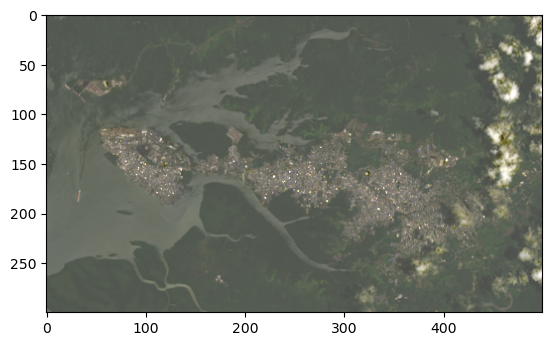

In [22]:
# Buenaventura True Color
b_true_color=true_color[5400:5700, 5500:6000, 0:3]
plt.figure()
plt.imshow(b_true_color)

In [23]:
b_true_color.shape

(300, 500, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


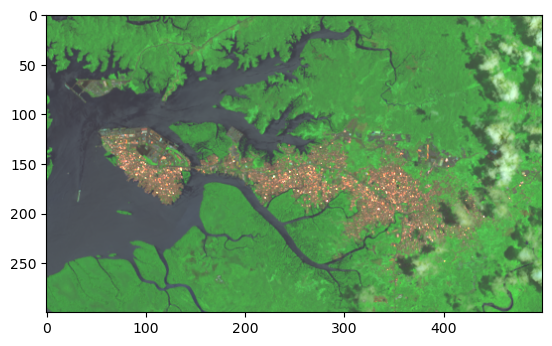

In [24]:
# Buenaventura False Color
b_false_color=false_color[5400:5700, 5500:6000, 0:3]
plt.figure()
plt.imshow(b_false_color)

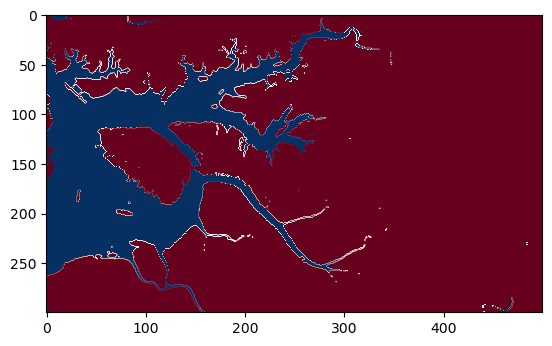

In [25]:
# Buenaventura Water Mask
b_water_mask=water_mask[5400:5700, 5500:6000]
plt.figure()
plt.imshow(b_water_mask,cmap='RdBu')

#### 3.2  Simple spectral signature water
Created a function to stack all bands into a cube

In [26]:
def stack_img(img_dict, bands):
  arrays = []                # create an empty list
  for band in bands:         # loop through the bands
    arrays.append(img_dict[band]) # append our array to the arrays list
  return np.stack(arrays, axis=-1)

In [27]:
# Create a cube with the 7 bands for Buenaventura area
cube = stack_img(img_dict, bands)
b_cube=cube[5400:5700, 5500:6000,:]
b_cube.shape

(300, 500, 7)

Divided the DN values by 10,000 to obtain the surface reflectance values. These reflectance values represent the proportion of light reflected by the Earth's surface in each spectral band.

In [28]:
b_water_pixels=b_cube[b_water_mask]/10000

Got the mean values and the standard deviation of each band for the water pixels.

In [29]:
b_water_mean = b_water_pixels.mean(axis=0)
b_water_std = b_water_pixels.std(axis=0)
b_water_mean

array([0.87639406, 0.92344454, 1.024742  , 0.97929753, 0.93988896,
       0.92090181, 0.88204829])

Obtained the central wavelenghts for each band in the following documentation: [What are the band designations for the Landsat satellites?](https://www.usgs.gov/faqs/what-are-band-designations-landsat-satellites?qt-news_science_products=0#qt-news_science_products)

In [30]:
wls = [0.44, 0.47, 0.56, 0.655, 0.865, 1.61, 2.2]

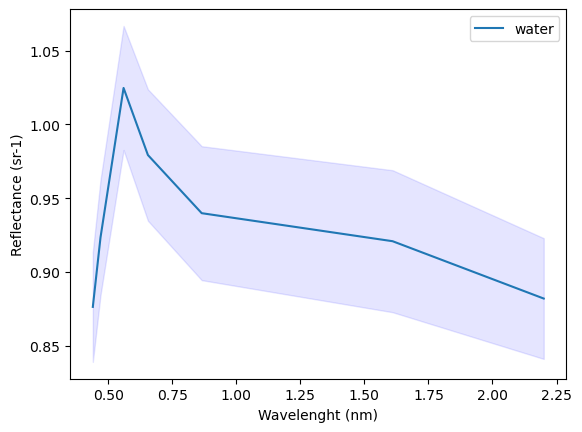

In [31]:
# Plot Water Signature
plt.figure()
plt.plot(wls, b_water_mean, label='water')
plt.fill_between(wls, b_water_mean-0.5*b_water_std, b_water_mean+0.5*b_water_std, color='blue', alpha=0.1)
plt.xlabel('Wavelenght (nm)')
plt.ylabel('Reflectance (sr-1)')
plt.legend()

### Part 4: Raster bit masking

#### 4.1 Accessing bit masks in Python

Landsat 8 imagery utilizes a 16-bit data format to encode information in the QA_pixel band. The QA_pixel band, also known as the Quality Assessment band, contains valuable metadata about each pixel in the image.

![Landsat 8-9 Pixel Quality Assessment (QA_PIXEL) Bit Index](L_QA.png)

Source: [Landsat 8-9 Collection 2 (C2) Level 2 Science Product (L2SP) Guide](https://d9-wret.s3.us-west-2.amazonaws.com/assets/palladium/production/s3fs-public/media/files/LSDS-1619_Landsat-8-9-C2-L2-ScienceProductGuide-v4.pdf)

In [32]:
# Load the Landsat Image Bands 2,3,4 and QA band
img_dict_qa= load_landsat_image('data', ['B2', 'B3', 'B4', 'QA_PIXEL'])
img_dict_qa['QA_PIXEL']

Opening file data\LC08_L2SP_010057_20210915_20210925_02_T1_SR_B2.TIF
Opening file data\LC08_L2SP_010057_20210915_20210925_02_T1_SR_B3.TIF
Opening file data\LC08_L2SP_010057_20210915_20210925_02_T1_SR_B4.TIF
Opening file data\LC08_L2SP_010057_20210915_20210925_02_T1_QA_PIXEL.TIF


array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint16)

Defined a function that takes the QA_PIXEL band and a list of flags as arguments
* Observation: the funtion masks specific occurrences of the flags, rather than masking all of them at once

In [33]:
L8_flags = {
    'dilated_cloud': 1<<1,
    'cirrus': 1<<2, 
    'cloud': 1<<3,
    'shadow': 1<<4, 
    'snow': 1<<5, 
    'clear': 1<<6,
    'water': 1<<7
}

def get_mask(qa_pixel_band, flags_list):
    
    # The final mask is initialized with zeros and the same shape as the qa_pixel band
    final_mask = np.zeros_like(qa_pixel_band)
    
    # Loop through each of the flags of interest
    for flag in flags_list:
        # Bitwise AND operation between each pixel of the qa_pixel_band and the flag reference
        flag_mask = np.bitwise_and(qa_pixel_band, L8_flags[flag])
        
        # Bitwise OR operation to accumulate all the flagged pixels across different flags 
        final_mask = final_mask | flag_mask
    
    return final_mask > 0

Created two separate masks. One of them with clouds, cirrus and dilated clouds and the other one with shadows.

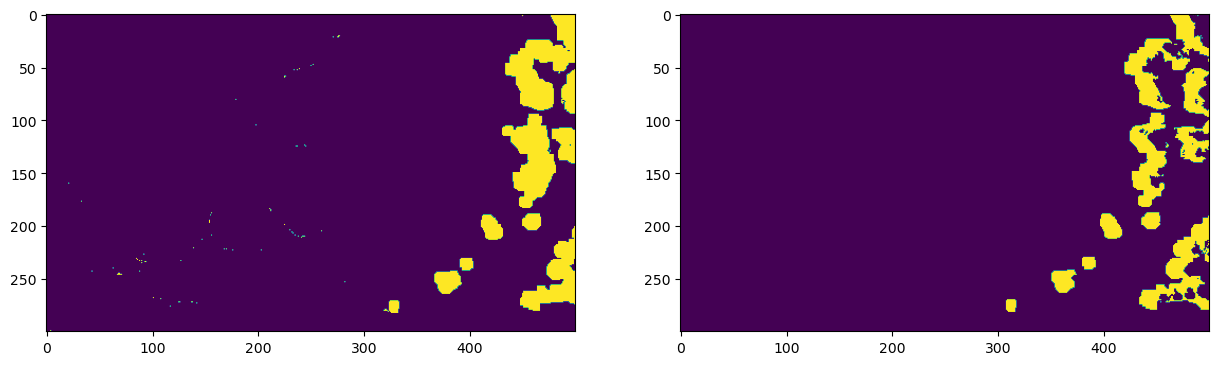

In [34]:
clouds = get_mask(img_dict_qa['QA_PIXEL'], ['cirrus', 'cloud', 'dilated_cloud'])
shadows = get_mask(img_dict_qa['QA_PIXEL'], ['shadow'])

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].imshow(clouds[5400:5700, 5500:6000])
ax[1].imshow(shadows[5400:5700, 5500:6000])

#### 4.2 Overlay the masks with the RGB image

Displayed Clouds with yellow and Shadows with red

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


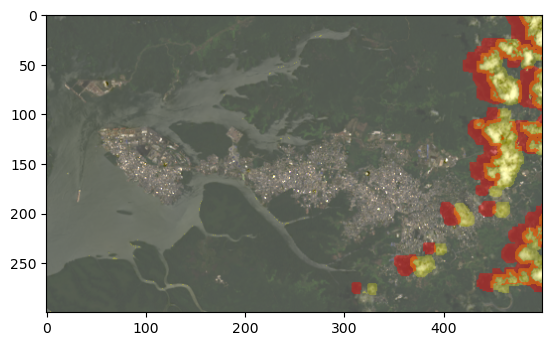

In [35]:
clouds_reshaped = np.repeat(clouds[5400:5700, 5500:6000, np.newaxis], 3, axis=2)
shadows_reshaped = np.repeat(shadows[5400:5700, 5500:6000, np.newaxis], 3, axis=2)

masked_clouds_img= np.where(clouds_reshaped, [1, 1, 0], b_true_color)
masked_shadows_img= np.where(shadows_reshaped, [1, 0, 0], b_true_color)

# Display the RGB image with the cloud mask overlay
fig, ax = plt.subplots()
ax.imshow(b_true_color)
ax.imshow(masked_clouds_img, alpha=0.4)  # Overlay the masked array with alpha blending
ax.imshow(masked_shadows_img, alpha=0.4)
plt.show()